# Working with breast cancer data set

* KFold cross validation
    * Grid search 
    * Random Search
* parameter tuning
* Performance Metric or measures
    * Classification accuracy
    * Confusion matrix
    * Precision
    * Recall 
* Model selection
* Feature extraction 



In [8]:
from sklearn.datasets import load_breast_cancer

In [9]:
breast_cancer=load_breast_cancer()

In [10]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [11]:
X=breast_cancer.data
y=breast_cancer.target
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20)

In [12]:
X_train.shape

(455, 30)

In [13]:
X_test.shape

(114, 30)

## Logistic model

In [14]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
logistic.fit(X_train,y_train)
logistic.score(X_test,y_test)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9385964912280702

## Decision Tree model

In [15]:
from sklearn.tree import DecisionTreeClassifier
tree_model=DecisionTreeClassifier()
tree_model.fit(X_train,y_train)
tree_model.score(X_test,y_test)

0.956140350877193

## Knn model

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9473684210526315

## Working with different random states:Knn


In [17]:
score=[]
for j in range(1,100):   
    X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=j)
    knn=KNeighborsClassifier()## Default is k=5
    knn.fit(X_train,y_train)
#     print(knn.score(X_train,y_train))## Training accuracy
    score.append(round(knn.score(X_test,y_test),4))## Testing accuracy
# print(score)
print(sum(score)/len(score))

0.9322020202020207


## Working with different random states:Logistic

In [18]:
score=[]
for j in range(1,100):   
    X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=j)
    logistic=LogisticRegression()
    logistic.fit(X_train,y_train)
#     print(knn.score(X_train,y_train))## Training accuracy
    score.append(round(logistic.score(X_test,y_test),4))## Testing accuracy
# print(score)
print(sum(score)/len(score))

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

0.9422171717171712


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

## Working with different random states:Decision Tree

In [19]:
score=[]
for j in range(1,100):   
    X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=j)
    tree=DecisionTreeClassifier()
    tree.fit(X_train,y_train)
#     print(knn.score(X_train,y_train))## Training accuracy
    score.append(round(tree.score(X_test,y_test),4))## Testing accuracy
# print(score)
print(round(sum(score)/len(score),4))

0.9299


## Kfold cross validation

In [20]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(knn,X,y,cv=100,scoring="accuracy")

In [21]:
scores.mean()

0.931

In [22]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(knn,X,y,cv=10,scoring="accuracy")
scores.mean()

0.9297619047619046

In [23]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(knn,X,y,cv=200,scoring="accuracy")
scores.mean()

0.9333333333333332

In [24]:
X.shape

(569, 30)

In [25]:
scores=cross_val_score(logistic,X,y,cv=10,scoring="accuracy")
scores.mean()

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

0.9455513784461151

In [26]:
scores=cross_val_score(tree_model,X,y,cv=100,scoring="accuracy")
scores.mean()

0.9326666666666666

In [27]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [28]:
import numpy as np
np.unique(breast_cancer.target)

array([0, 1])

In [29]:
(y==1).sum()

357

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,knn.predict(X_test))

array([[40,  4],
       [ 5, 94]], dtype=int64)

In [31]:
confusion_matrix(y_test,logistic.predict(X_test))

array([[40,  4],
       [ 2, 97]], dtype=int64)

In [32]:
confusion_matrix(y_test,tree_model.predict(X_test))

array([[42,  2],
       [ 0, 99]], dtype=int64)

## precision

In [33]:
scores=cross_val_score(tree_model,X,y,cv=100,scoring="precision")
scores.mean()

0.9605

In [34]:
from sklearn.metrics import precision_score
precision_score(y_test,tree_model.predict(X_test))

0.9801980198019802

In [35]:
from sklearn.metrics import recall_score
recall_score(y_test,tree_model.predict(X_test))

1.0

## bias variance trade off 

Text(0.5, 1.0, 'Accuracy')

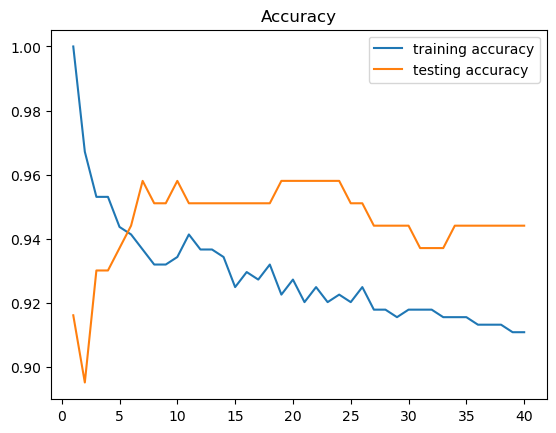

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
test_score=[]
train_score=[]
for i in range(1,41):
    knn=KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    train_score.append(knn.score(X_train,y_train))
    test_score.append(knn.score(X_test,y_test))
plt.plot(range(1,41),train_score,label='training accuracy')
plt.plot(range(1,41),test_score,label='testing accuracy')
plt.legend()

plt.title("Accuracy")

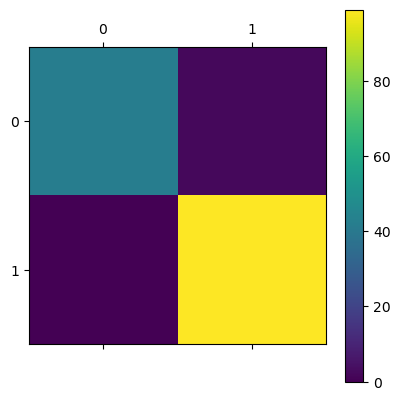

In [37]:
plt.matshow(confusion_matrix(y_test,tree_model.predict(X_test)))
plt.colorbar()

In [38]:
from sklearn.datasets import load_breast_cancer

In [39]:
cancer=load_breast_cancer()

In [40]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [41]:
X=cancer.data

In [42]:
y=cancer.target

In [43]:
X.shape

(569, 30)

In [44]:
y.shape

(569,)

In [45]:
X[:10]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [46]:
y[:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0])

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knn=KNeighborsClassifier()

In [51]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [52]:
knn.score(X_train,y_train)## training accuracy

0.9342723004694836

In [53]:
knn.score(X_test,y_test)

0.972027972027972

In [54]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score

In [55]:
y_pred=knn.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[47,  3],
       [ 1, 92]], dtype=int64)

In [56]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'actual  classes')

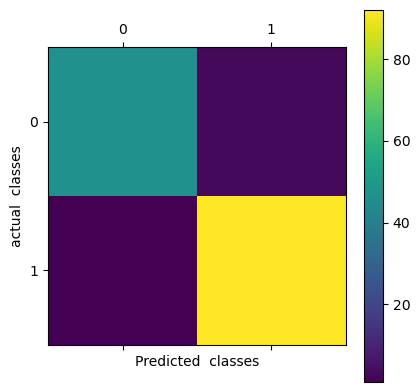

In [61]:
plt.matshow(confusion_matrix(y_test,y_pred))
plt.colorbar()
plt.xlabel("Predicted  classes")
plt.ylabel("actual  classes")

In [62]:
X_test

array([[1.729e+01, 2.213e+01, 1.144e+02, ..., 1.528e-01, 3.067e-01,
        7.484e-02],
       [1.247e+01, 1.731e+01, 8.045e+01, ..., 1.053e-01, 3.035e-01,
        7.661e-02],
       [1.129e+01, 1.304e+01, 7.223e+01, ..., 8.750e-02, 2.733e-01,
        8.022e-02],
       ...,
       [1.371e+01, 2.083e+01, 9.020e+01, ..., 1.556e-01, 3.196e-01,
        1.151e-01],
       [9.667e+00, 1.849e+01, 6.149e+01, ..., 6.560e-02, 3.174e-01,
        8.524e-02],
       [1.174e+01, 1.469e+01, 7.631e+01, ..., 1.056e-01, 2.604e-01,
        9.879e-02]])

In [63]:
y_test

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1])

In [64]:
y_pred[10]

0

In [65]:
knn.predict_proba(X_test)[10]

array([1., 0.])

In [66]:
precision_score(y_test,y_pred)

0.968421052631579

In [67]:
recall_score(y_test,y_pred)

0.989247311827957

In [68]:
from sklearn.metrics import f1_score,classification_report

In [69]:
f1_score(y_test,y_pred)

0.9787234042553192

In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        50
           1       0.97      0.99      0.98        93

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.97       143
weighted avg       0.97      0.97      0.97       143

